YF.download() has changed argument auto_adjust default to True
--- Results for NVDA vs ^GSPC ---
Beta:  2.0202
Alpha (Annualized): 0.8047 (80.47%)


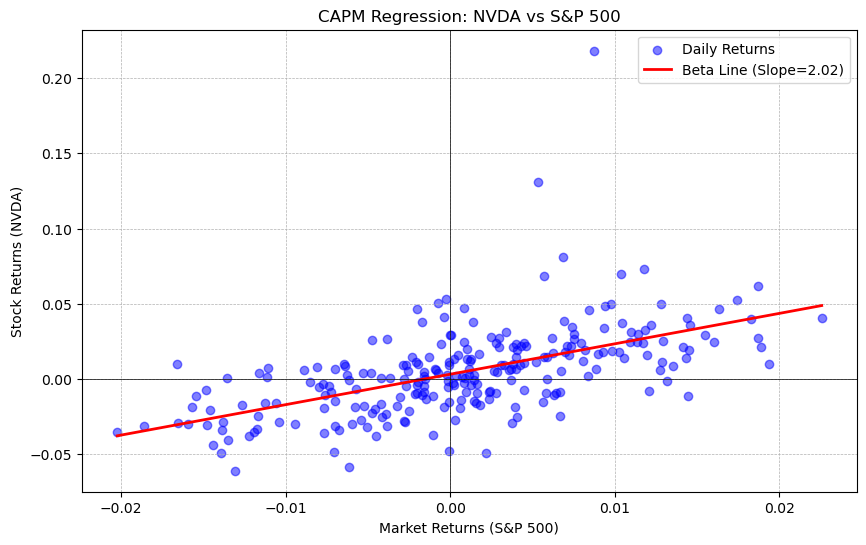

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_alpha_beta(stock_ticker, benchmark_ticker, start_date, end_date):
    # 1. Download historical data
    tickers = [stock_ticker, benchmark_ticker]
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
    
    # 2. Calculate Daily Returns
    # We use Log Returns for better mathematical properties, but simple pct_change is fine too
    log_returns = np.log(data / data.shift(1))
    log_returns = log_returns.dropna()
    
    # 3. Define X (Benchmark) and Y (Stock)
    market_returns = log_returns[benchmark_ticker]
    stock_returns = log_returns[stock_ticker]
    
    # 4. Calculate Beta and Alpha using Linear Regression (np.polyfit)
    # Degree 1 fits a linear line: y = mx + c (Returns = Beta * Market + Alpha)
    beta, alpha_daily = np.polyfit(market_returns, stock_returns, 1)
    
    # 5. Annualize the Alpha
    # Alpha from the regression is daily. We multiply by 252 (trading days) to see annualized performance.
    alpha_annualized = alpha_daily * 252

    return beta, alpha_annualized, market_returns, stock_returns

# --- Configuration ---
STOCK = 'NVDA'       # Example: NVIDIA
BENCHMARK = '^GSPC'  # S&P 500 Index
START = '2023-01-01'
END = '2024-01-01'

# --- Execution ---
beta, alpha, market_ret, stock_ret = calculate_alpha_beta(STOCK, BENCHMARK, START, END)

print(f"--- Results for {STOCK} vs {BENCHMARK} ---")
print(f"Beta:  {beta:.4f}")
print(f"Alpha (Annualized): {alpha:.4f} ({(alpha*100):.2f}%)")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.scatter(market_ret, stock_ret, alpha=0.5, color='blue', label='Daily Returns')

# Create the regression line
x_axis = np.linspace(market_ret.min(), market_ret.max(), 100)
y_axis = beta * x_axis + (alpha/252) # Convert annualized alpha back to daily for the plot intercept

plt.plot(x_axis, y_axis, color='red', linewidth=2, label=f'Beta Line (Slope={beta:.2f})')
plt.title(f'CAPM Regression: {STOCK} vs S&P 500')
plt.xlabel('Market Returns (S&P 500)')
plt.ylabel(f'Stock Returns ({STOCK})')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()